In [1]:
%pylab inline

import pickle
results = {}
cases =  ["inst", "last"]
for case in cases:
    results[case] = []
    for i in range(15):
        file_name = "exper_results/" + case + "_" + str(i) + ".picke"
        with open(file_name, "rb") as f:
            results[case].append(pickle.load(f))
print("loaded")

Populating the interactive namespace from numpy and matplotlib
loaded


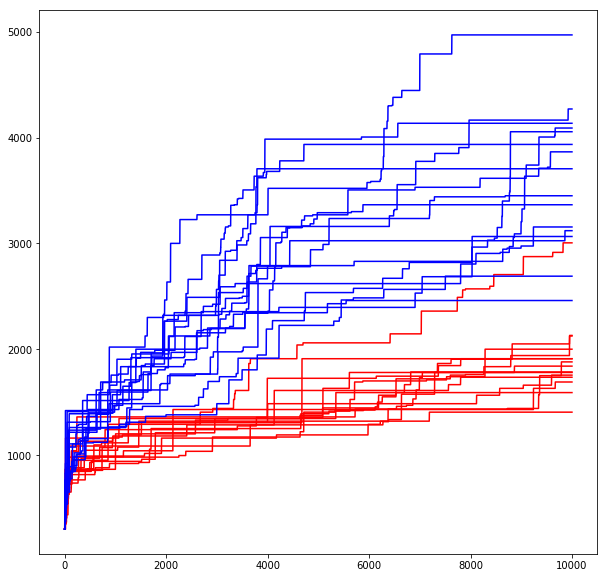

In [4]:
figsize(10,10)
colors = ["red","blue"]
for color,case in zip(colors,cases):
    for t in results[case]:
        plot(t.best_score_history,color=color)

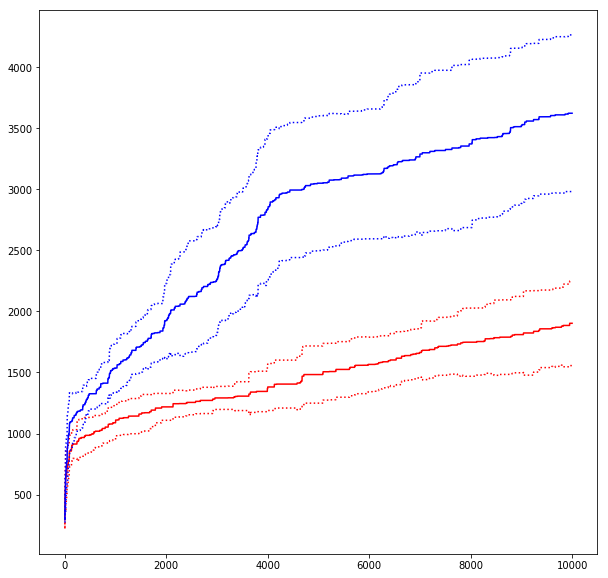

In [5]:
for color,case in zip(colors,cases):
    a = average(array([results[case][j].best_score_history for j in range(len(results[case]))]),axis=0)
    v = var(array([results[case][j].best_score_history for j in range(len(results[case]))]),axis=0)
    plot(a,color=color)
    plot(a+sqrt(v),color=color,linestyle=":")
    plot(a-sqrt(v),color=color,linestyle=":")

In [6]:
import scipy.stats
inst_scores = []
last_scores = []
for r in results["inst"]:
    inst_scores.append(r.best_score)
for r in results["last"]:
    last_scores.append(r.best_score)
stats = scipy.stats.mannwhitneyu(inst_scores,last_scores, alternative = "less")
print(inst_scores)
print(last_scores)
print(stats)
array(inst_scores)<array(last_scores)


[1690, 1780, 2000, 1755, 2130, 1785, 1910, 1590, 1840, 1405, 1910, 1735, 2125, 3005, 1880]
[4970, 3865, 3065, 3450, 3365, 2690, 4090, 4055, 3705, 3120, 3935, 2460, 4135, 3155, 4270]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)